<a href="https://colab.research.google.com/github/leo-Ansh2004/Projects/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Define Stock Symbol
stock_symbol = "Googl"

# Download historical data from Yahoo Finance
data = yf.download(stock_symbol, start='2010-01-01', end='2023-01-01')
data.head(100)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...
2010-05-20,12.138889,12.151652,11.856857,11.887137,11.887137,196335468
2010-05-21,11.738238,12.137137,11.621622,11.813063,11.813063,387244368
2010-05-24,12.030280,12.257007,11.931932,11.940941,11.940941,173650176


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [6]:
#Get a Statiscal Summary
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,49.161187,49.650301,48.653316,49.160898,49.160898,6.017541e+07
std,35.810449,36.216443,35.387644,35.804094,35.804094,4.957609e+07
min,10.968719,11.068068,10.851602,10.912663,10.912663,9.312000e+06
25%,20.281718,20.426114,20.172359,20.295858,20.295858,2.894200e+07
50%,38.527750,38.931250,38.224501,38.563002,38.563002,4.123200e+07
75%,61.837625,62.265000,61.218125,61.738001,61.738001,7.927251e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,5.923990e+08


In [7]:
# Get a summary of your ALL data
data.describe(include="all")

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,49.161187,49.650301,48.653316,49.160898,49.160898,6.017541e+07
std,35.810449,36.216443,35.387644,35.804094,35.804094,4.957609e+07
min,10.968719,11.068068,10.851602,10.912663,10.912663,9.312000e+06
25%,20.281718,20.426114,20.172359,20.295858,20.295858,2.894200e+07
50%,38.527750,38.931250,38.224501,38.563002,38.563002,4.123200e+07
75%,61.837625,62.265000,61.218125,61.738001,61.738001,7.927251e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,5.923990e+08


In [9]:
#Check for Null
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Find the Correlation in our data
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999871,0.999856,0.999695,0.999695,-0.472816
High,0.999871,1.000000,0.999822,0.999854,0.999854,-0.471273
Low,0.999856,0.999822,1.000000,0.999864,0.999864,-0.475476
Close,0.999695,0.999854,0.999864,1.000000,1.000000,-0.473755
Adj Close,0.999695,0.999854,0.999864,1.000000,1.000000,-0.473755
Volume,-0.472816,-0.471273,-0.475476,-0.473755,-0.473755,1.000000


<Axes: >

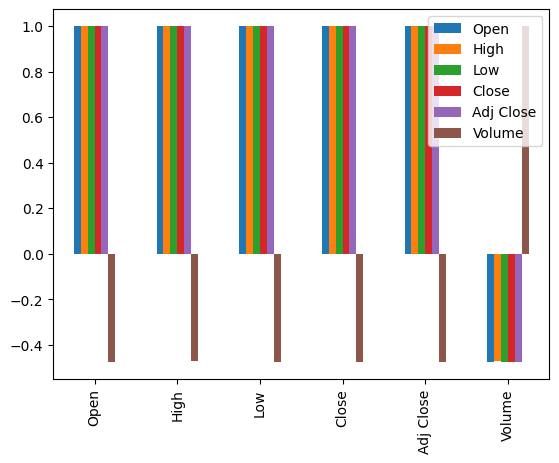

In [11]:
#Call the plot() method and set the kind parameter to bar
data.corr().plot(kind="bar")

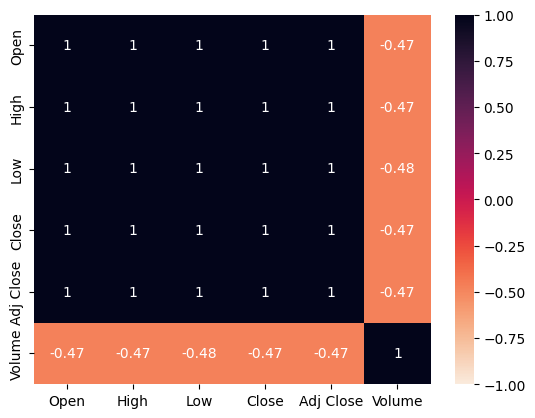

In [12]:
# Import Season Library
import seaborn as sns

sns.heatmap(data.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

In [13]:
# Drop unneccesary Columns
data.drop(['Adj Close', 'Volume'], axis=1, inplace=True)
data.head(20)

,Open,High,Low,Close
Date,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434
2010-01-05,15.695195,15.711712,15.554054,15.615365
2010-01-06,15.662162,15.662162,15.174174,15.221722
2010-01-07,15.250250,15.265265,14.831081,14.867367
2010-01-08,14.814815,15.096346,14.742492,15.065566
2010-01-11,15.126627,15.126627,14.865866,15.042793
2010-01-12,14.956206,14.968969,14.714715,14.776777
2010-01-13,14.426677,14.724224,14.361862,14.691942
2010-01-14,14.612112,14.869870,14.584835,14.761011


<Axes: xlabel='Date'>

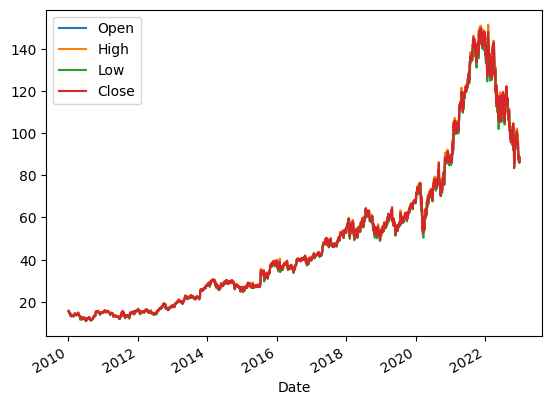

In [14]:
# Use the plot function to plot
data.plot()

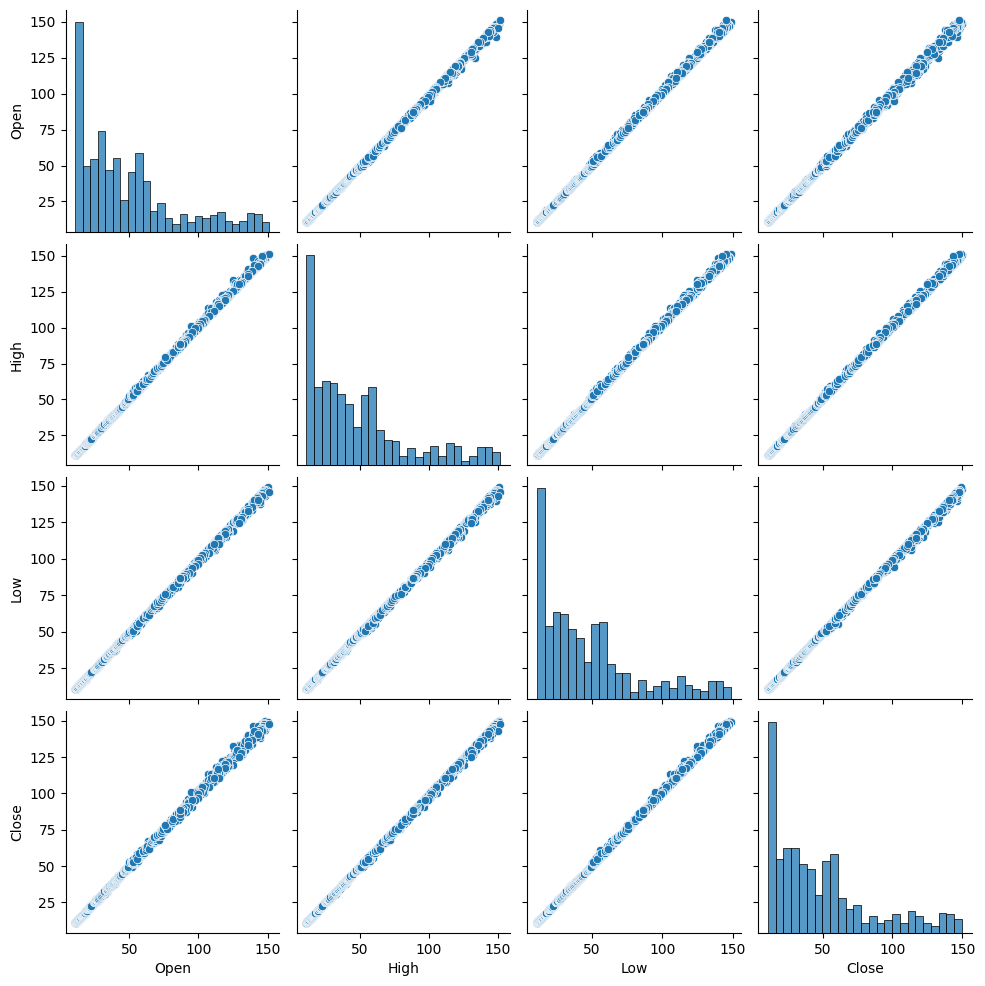

In [15]:
# Use seaborn to plot Data
sns.pairplot(data)

In [16]:
# Declare two variables to hold the two sets
x= data[['Open', 'High', 'Low']].values
y= data[['Close']].values

# You can out put variables x and y to see their result
print(x)
print(y)

[[15.68943882 15.7535038  15.62162209]
 [15.6951952  15.71171188 15.55405426]
 [15.66216183 15.66216183 15.17417431]
 ...
 [86.98000336 88.04000092 85.94000244]
 [86.62000275 88.84999847 86.61000061]
 [86.98000336 88.30000305 86.56999969]]
[[15.68443394]
 [15.61536503]
 [15.22172165]
 ...
 [86.01999664]
 [88.44999695]
 [88.23000336]]


In [17]:
# import train_test_split
from sklearn.model_selection import train_test_split

# Split data into two sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [18]:
# Instantiate Linear Regression
model = LinearRegression()

#Train model
model.fit(x_train,y_train)

LinearRegression()

In [19]:
# Make prediction on test data
prediction = model.predict(x_test)

#Predict it
prediction


array([[ 38.41938243],
       [ 38.29856683],
       [ 15.02949062],
       [ 14.89006945],
       [ 71.52205884],
       [146.50588485],
       [ 26.89109283],
       [ 36.96038651],
       [ 17.76878454],
       [131.56448239],
       [130.39824484],
       [ 22.20489829],
       [ 15.40924379],
       [ 17.39325805],
       [ 27.96217877],
       [ 70.62450092],
       [ 14.40097394],
       [ 60.02333204],
       [ 13.5852569 ],
       [ 15.85722858],
       [ 63.27486014],
       [ 25.32751237],
       [ 37.69706999],
       [ 15.34823452],
       [ 75.16037793],
       [ 28.55190138],
       [ 38.98913322],
       [ 58.81236819],
       [ 47.77493723],
       [ 61.2145368 ],
       [ 74.66647964],
       [ 47.61193937],
       [ 17.92415643],
       [128.25397195],
       [ 57.01161027],
       [ 71.98203085],
       [ 27.86139372],
       [ 14.05426784],
       [ 47.03416915],
       [ 37.01826173],
       [ 12.55373727],
       [ 14.73773423],
       [ 93.98338409],
       [ 61

In [20]:
# Compare Actual and Predicted
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
comparison.head(20)

,Actual,Predicted
0,38.587502,38.419382
1,38.256001,38.298567
2,14.939189,15.029491
3,14.999750,14.890069
4,71.676003,71.522059
5,146.654999,146.505885
6,26.929501,26.891093
7,36.869499,36.960387
8,17.767267,17.768785
9,131.906494,131.564482


Text(0, 0.5, 'Closing Price')

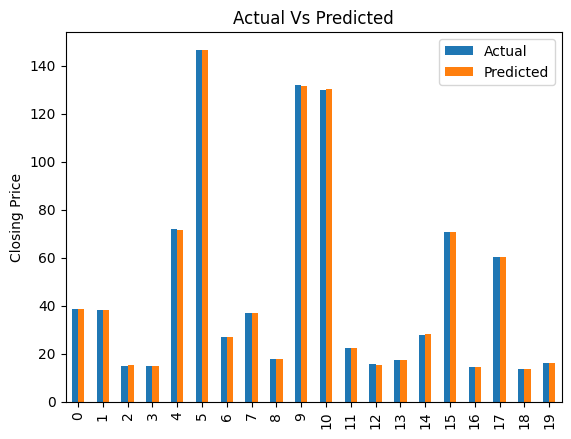

In [21]:
# Visualize the comparison using MatPlotlib
cGraph = comparison.head(20)
cGraph.plot(kind='bar')
plt.title('Actual Vs Predicted')
plt.ylabel('Closing Price')


In [22]:
# Let's score this model using the test data
model.score(x_test, y_test)

0.9998910097609978

In [23]:
# Import library
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.9998910097609978

In [25]:
# Libraries
import math
from sklearn import metrics

#Metrics to find accuracy of continous variables
print('_____________________________________')
print('Mean Absolute Error (MAE)')
mav = metrics.mean_absolute_error(y_test, prediction)
print('MAE Value:' ,mav)

print('_____________________________________')
print('Mean Squared Error (MSE)')
mse = metrics.mean_squared_error(y_test, prediction)
print('MSE Value:' ,mse)

print('_____________________________________')
print('Root Mean Squared Error Value (RMSE)')
rmse = math.sqrt(metrics.mean_squared_error(y_test,prediction))
print('RMSE Value:' , rmse)

_____________________________________
Mean Absolute Error (MAE)
MAE Value: 0.22217939437968284
_____________________________________
Mean Squared Error (MSE)
MSE Value: 0.1422144330416654
_____________________________________
Root Mean Squared Error Value (RMSE)
RMSE Value: 0.3771132893994395
